## Student Information
Name：薛擎

---


## **Instruction**
  
Welcome to NEAF DIP workshop!  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

---

## **1. Histogram Equalization**
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  

<img src="md_picture/1.png" width="60%" heught="60%">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

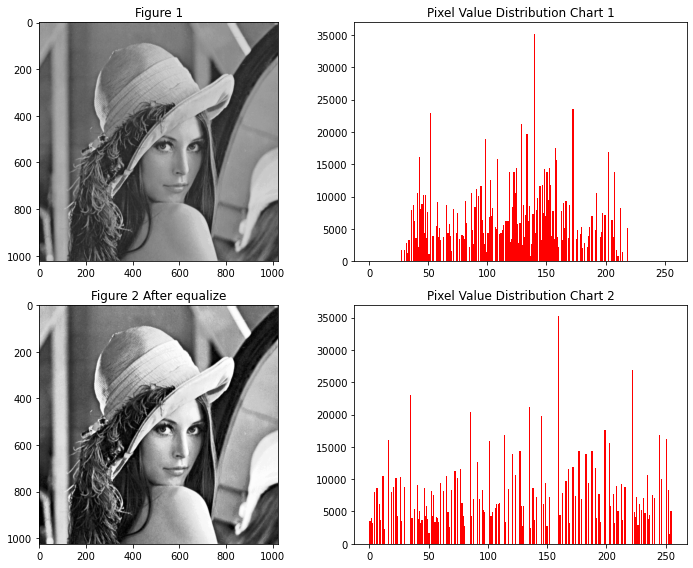

True

In [2]:
img_ori = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.

fig, axes = plt.subplots(2, 2, figsize = (10, 8))

img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
axes[0, 0].imshow(img_gray)
axes[0, 0].set_title('Figure 1')

# plt.hist
axes[0, 1].hist(img_ori.flatten(), 256, [0, 256], color='r')
axes[0, 1].set_title('Pixel Value Distribution Chart 1')

# cv2.equalizeHis -> 直方圖均衡化，將灰度值均衡到0~255的分布。
eqHist = cv2.equalizeHist(img_ori)
eqHist_gray = cv2.cvtColor(eqHist, cv2.COLOR_BGR2RGB)
axes[1, 0].imshow(eqHist_gray)
axes[1, 0].set_title('Figure 2 After equalize')
axes[1, 1].hist(eqHist.flatten(), 256, [0, 255], color='r')
axes[1, 1].set_title('Pixel Value Distribution Chart 2')

# show
plt.tight_layout()
plt.show()

# save result
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', eqHist)

_keywords: plt.hist, cv2.equalizeHist, cv2.calcHist_

---

## **2. Mean blur, Gaussian blur, Median blur**

Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.

<img src="md_picture/2.png" width="60%" heught="60%">
<img src="md_picture/3.png" width="60%" heught="60%">
<img src="md_picture/blur.JPG" width="60%" heught="60%">

https://shengyu7697.github.io/python-opencv-blur/

https://blog.51cto.com/yang/4569671

https://www.cnblogs.com/my-love-is-python/p/10391923.html/

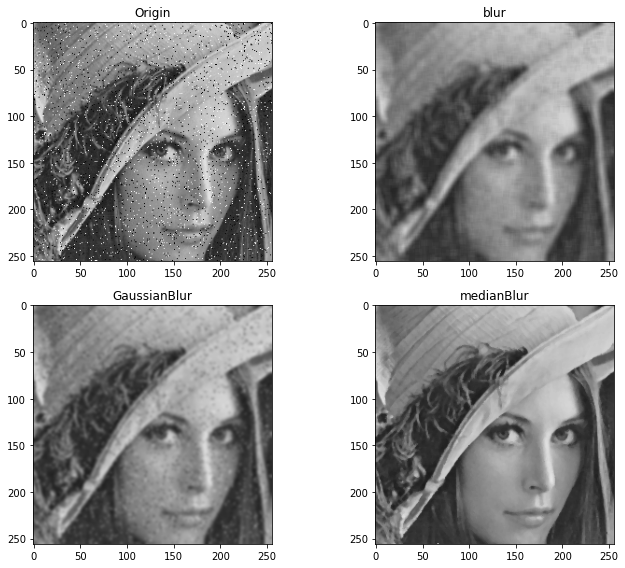

True

In [3]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

#subplot
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

# show origin RGB
img_noise_RGB = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)
axes[0, 0].set_title('Origin')
axes[0, 0].imshow(img_noise_RGB)


# --Blur the image by three methods.
# 1.cv2.blur
blur_img = cv2.blur(img_noise_RGB, (7, 7))
axes[0, 1].set_title('blur')
axes[0, 1].imshow(blur_img)

# 2.cv2.GaussianBlur
GaussianBlur_img = cv2.GaussianBlur(img_noise_RGB, (7, 7), 0)
axes[1, 0].set_title('GaussianBlur')
axes[1, 0].imshow(GaussianBlur_img)

# 3.cv2.medianBlur
medianBlur_img = cv2.medianBlur(img_noise_RGB, 3)
axes[1, 1].set_title('medianBlur')
axes[1, 1].imshow(medianBlur_img)

# show
plt.tight_layout()
plt.show()

# save result
cv2.imwrite('output/img_mean_blur.png', blur_img)
cv2.imwrite('output/img_gaussian_blur.png', GaussianBlur_img)
cv2.imwrite('output/img_median_blur.png', medianBlur_img)

### Question:
1. What is the difference between three methods? When to use them?
(https://shengyu7697.github.io/python-opencv-blur/)

--> 1.mean blur：平均濾波，kernel的值皆為1，用於計算被kernel所覆蓋區域之平均值，並以該值取代中間位置的像素值。

--> 2.median blur：中值濾波，取出被kernel所覆蓋區域之中值，並以該值取代中間位置的像素值。(適合用於去噪點)

--> 3.gaussian blur：高斯濾波，給予每個kernel中的pixel不同權重，中心pixel的權重最高，越往邊角權重就越低。(讓圖片失真較少)

.

.

2. What is the difference if the kernel size changes?  
-->根據大小可以修改模糊程度、或是細節的保留程度、...等，非常多。


_keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur_

---

## **3. Binary**
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  

<img src="md_picture/4.png" width="60%" heught="60%">

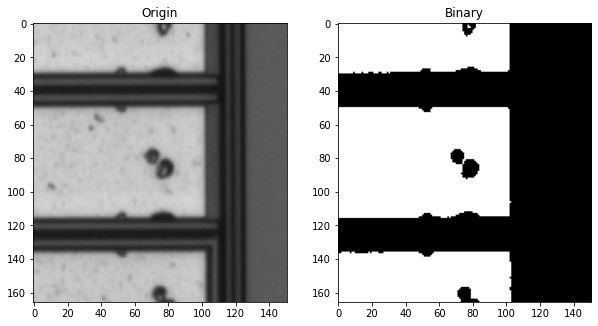

True

In [4]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

binary1_RGB = cv2.cvtColor(binary1, cv2.COLOR_BGR2RGB)
axes[0].set_title('Origin')
axes[0].imshow(binary1_RGB)

# Do the image binary to seperate pad and background
ret, binary_img = cv2.threshold(binary1, 115, 255, cv2.THRESH_BINARY)
binary_img_RGB = cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB)
axes[1].set_title('Binary')
axes[1].imshow(binary_img_RGB)
plt.show()

# save result
cv2.imwrite('output/binary_task1.bmp', binary_img)

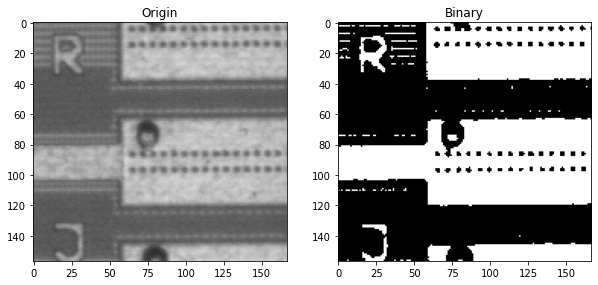

True

In [5]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

binary2_RGB = cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB)
axes[0].set_title('Origin')
axes[0].imshow(binary2_RGB)

# Do the image binary to seperate pad and background
ret, binary_img = cv2.threshold(binary2, 130, 255, cv2.THRESH_BINARY)
binary_img_RGB = cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB)
axes[1].set_title('Binary')
axes[1].imshow(binary_img_RGB)
plt.show()

# save result
cv2.imwrite('output/binary_task2.bmp', binary_img)

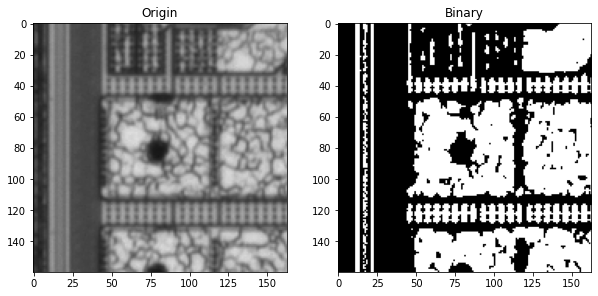

True

In [6]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

binary3_RGB = cv2.cvtColor(binary3, cv2.COLOR_BGR2RGB)
axes[0].set_title('Origin')
axes[0].imshow(binary3_RGB)

# Do the image binary to seperate pad and background
ret, binary_img = cv2.threshold(binary3, 120, 255, cv2.THRESH_BINARY)
binary_img_RGB = cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB)
axes[1].set_title('Binary')
axes[1].imshow(binary_img_RGB)
plt.show()

# save result
cv2.imwrite('output/binary_task3.bmp', binary_img)

### Questions:
1. What are the limits of this methods?

-->若要擷取出的特徵區域雜訊過多，或是亮度不均勻時，很難以一個固定的閥值去做二值化。

2. What if the light source is not uniform? Is this method still work? How to improve it?  

-->這部分可能要先透過其他影像處的方法來處理亮度不均勻的問題。

_keywords: cv2.threshold_

## **4. HSV filter**
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

<img src="md_picture/5.png" width="30%" heught="30%">

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

- Noted: Blur, histogram equalization methods could be used if needed.  

https://ithelp.ithome.com.tw/articles/10234958?sc=iThelpR

https://hackmd.io/@Johnsonnnn/Syz1nMId_
Python Opencv 使用 HSV 擷取特定顏色

3171 2531 19 7


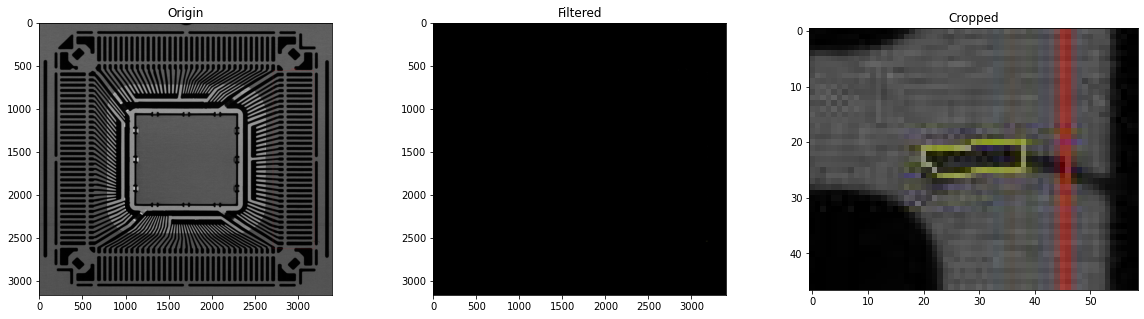

True

In [7]:
# Yellow box.
yellow = cv2.imread('input/yellow.jpg')

# subplot
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
yellow_rgb = cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)
axes[0].set_title("Origin")
axes[0].imshow(yellow_rgb)

# Step 1. Transfer color to HSV
yellow_hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)

# python_H = ps_H / 2
# python_S = ps_S * 255 / 100
# python_V = ps_V * 255 / 100

# Step 2. Setting the color range and filter the image.
lower_color = np.array([50/2, 5*255/100, 40*255/100])  # Lower HSV values
upper_color = np.array([80/2, 80*255/100, 70*255/100])  # Upper HSV values
color_mask = cv2.inRange(yellow_hsv, lower_color, upper_color)

filtered_img = cv2.bitwise_and(yellow, yellow, mask = color_mask)
filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
axes[1].set_title("Filtered")
axes[1].imshow(filtered_img_rgb)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
filtered_img_gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
ret, filtered_img_gray_bi = cv2.threshold(filtered_img_gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(filtered_img_gray_bi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 50:
        x, y, w, h = cv2.boundingRect(cnt)
        print(x, y, w, h)

# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropped_img = yellow[y-crop_edge : y+h+crop_edge, x-crop_edge : x+w+crop_edge]
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
axes[2].set_title("Cropped")
axes[2].imshow(cropped_img_rgb)

# show
plt.show()

# save result
cv2.imwrite('output/cropHSV_yellow.jpg', cropped_img)

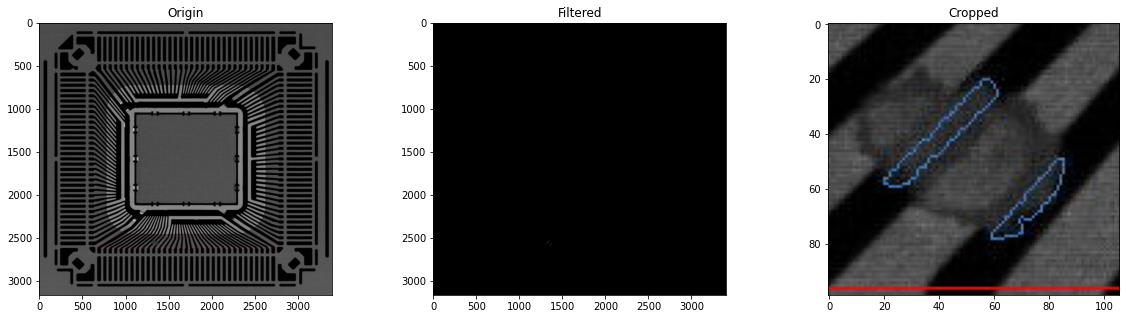

True

In [8]:
# Blue box.
blue = cv2.imread('input/blue.jpg')

# subplot
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
blue_rgb = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
axes[0].set_title("Origin")
axes[0].imshow(blue_rgb)

# Step 1. Transfer color to HSV
blue_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

# python_H = ps_H / 2
# python_S = ps_S * 255 / 100
# python_V = ps_V * 255 / 100

# Step 2. Setting the color range and filter the image.
lower_color = np.array([180/2, 20*255/100, 20*255/100])  # Lower HSV values
upper_color = np.array([235/2, 70*255/100, 80*255/100])  # Upper HSV values
color_mask = cv2.inRange(blue_hsv, lower_color, upper_color)

filtered_img = cv2.bitwise_and(blue, blue, mask = color_mask)
filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
axes[1].set_title("Filtered")
axes[1].imshow(filtered_img_rgb)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
filtered_img_gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
ret, filtered_img_gray_bi = cv2.threshold(filtered_img_gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(filtered_img_gray_bi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# black_image = np.zeros(blue.shape, dtype=np.uint8)
list = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 20:
        # cv2.drawContours(black_image, cnt, -1, (255, 0, 0), 4)
        list.append(cnt)
x, y, w, h = cv2.boundingRect(np.concatenate(list))

# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropped_img = blue[y-crop_edge : y+h+crop_edge, x-crop_edge : x+w+crop_edge]
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
axes[2].set_title("Cropped")
axes[2].imshow(cropped_img_rgb)

# show
plt.show()

# save result
cv2.imwrite('output/cropHSV_blue.jpg', cropped_img)

_cv2.bitwise_and() 是 OpenCV 中用於執行位元運算的函數之一，它可以將兩個圖像（或圖像和遮罩）進行位元 AND 運算，從而產生一個新的圖像，其中僅在兩個輸入圖像相對應位置的像素都為非零時，輸出圖像的像素才會設置為非零。_

---

## **5. Morphological: erosion, dilation, open, close**

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

<img src="md_picture/6.png" width="60%" heught="60%">

https://blog.csdn.net/qq_39507748/article/details/104539673

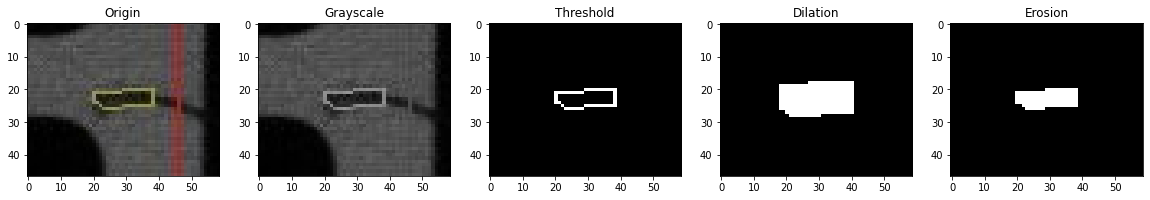

True

In [9]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')

# subplot
fig, axes = plt.subplots(1, 5, figsize = (20, 10))
hsv_yellow_rgb = cv2.cvtColor(hsv_yellow, cv2.COLOR_BGR2RGB)
axes[0].set_title('Origin')
axes[0].imshow(hsv_yellow_rgb)

# Gray
hsv_yellow_gray = cv2.cvtColor(hsv_yellow, cv2.COLOR_BGR2GRAY)
hsv_yellow_gray_rgb = cv2.cvtColor(hsv_yellow_gray, cv2.COLOR_BGR2RGB)
# blur = cv2.medianBlur(hsv_yellow_gray, 3)
# blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
axes[1].set_title('Grayscale')
axes[1].imshow(hsv_yellow_gray_rgb)

# Threshold
ret, binary = cv2.threshold(hsv_yellow_gray, 110, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[2].set_title('Threshold')
axes[2].imshow(binary_rgb)

# kernel
kernel = np.ones((3,3), np.uint8)

# Try to use erosion, dilation, open, close to fill up the lines.
dilation = cv2.dilate(binary, kernel, iterations = 2)
dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
axes[3].set_title('Dilation')
axes[3].imshow(dilation_rgb)

erosion = cv2.erode(dilation, kernel, iterations = 2)
erosion_rgb = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
axes[4].set_title('Erosion')
axes[4].imshow(erosion_rgb)

# subplot show
plt.show()

# save result
cv2.imwrite('output/morpho_yellow.jpg', erosion)

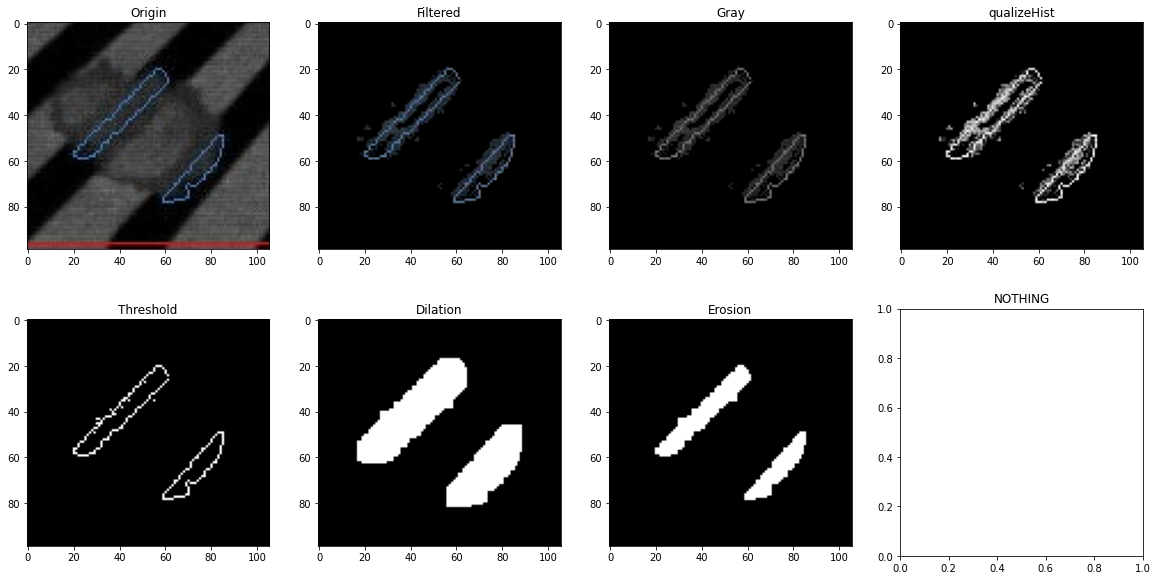

True

In [24]:
blue = cv2.imread('output/cropHSV_blue.jpg')

# subplot
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
blue_rgb = cv2.cvtColor(blue , cv2.COLOR_BGR2RGB)
axes[0, 0].set_title('Origin')
axes[0, 0].imshow(blue_rgb)

# Transfer color to HSV
blue_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

# --- python_H = ps_H / 2
# --- python_S = ps_S * 255 / 100
# --- python_V = ps_V * 255 / 100

# Setting the color range and filter the image.
lower_color = np.array([170/2, 15*255/100, 15*255/100])  # Lower HSV values
upper_color = np.array([240/2, 75*255/100, 85*255/100])  # Upper HSV values
color_mask = cv2.inRange(blue_hsv, lower_color, upper_color)

filtered_img = cv2.bitwise_and(blue, blue, mask = color_mask)
filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
axes[0, 1].set_title("Filtered")
axes[0, 1].imshow(filtered_img_rgb)

# Gray
gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
axes[0, 2].set_title("Gray")
axes[0, 2].imshow(gray_rgb)

# equalizeHist
eqHist = cv2.equalizeHist(gray)
eqHist_rgb = cv2.cvtColor(eqHist, cv2.COLOR_BGR2RGB)
axes[0, 3].set_title("qualizeHist")
axes[0, 3].imshow(eqHist_rgb)

# Threshold
ret, binary = cv2.threshold(eqHist, 190, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[1, 0].set_title("Threshold")
axes[1, 0].imshow(binary_rgb)

# kernel
kernel = np.ones((3,3), np.uint8)

# Try to use erosion, dilation, open, close to fill up the lines.
dilation = cv2.dilate(binary, kernel, iterations = 3)
dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
axes[1, 1].set_title('Dilation')
axes[1, 1].imshow(dilation_rgb)

erosion = cv2.erode(dilation, kernel, iterations = 3)
erosion_rgb = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
axes[1, 2].set_title('Erosion')
axes[1, 2].imshow(erosion_rgb)

# subplot show
axes[1, 3].set_title('NOTHING')
plt.show()

# save result
cv2.imwrite('output/morpho_blue.jpg', erosion)

_keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx_

---

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

<img src="md_picture/7.png" width="60%" heught="60%">

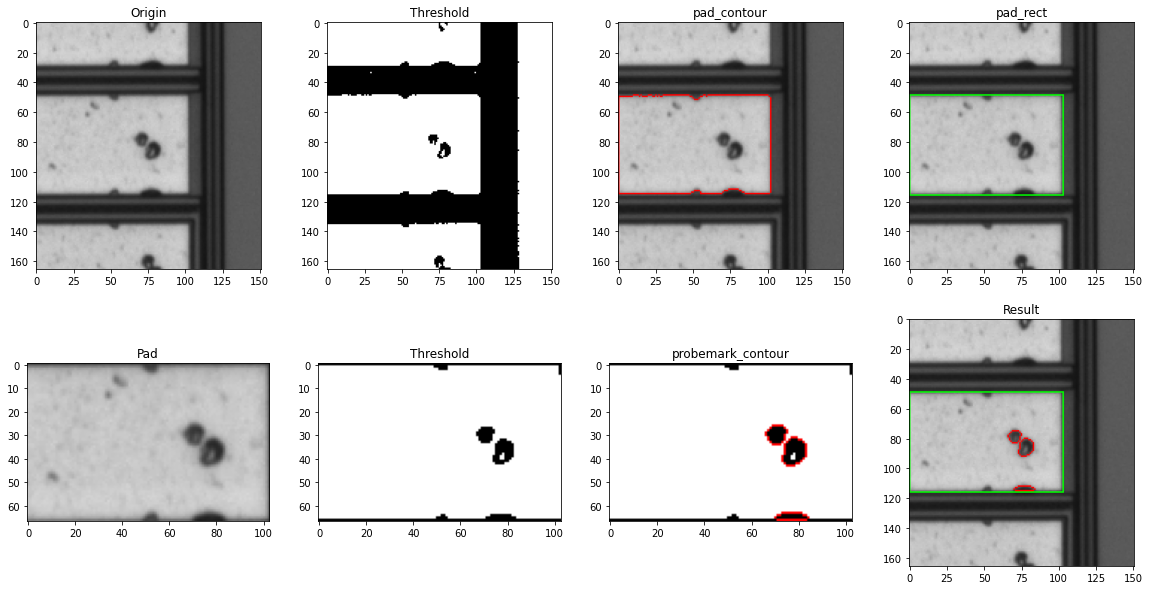

The pad area is  6901
The probe mark area is  180.0


In [12]:
pad_task1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# subplots
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
pad_task1_rgb = cv2.cvtColor(pad_task1, cv2.COLOR_BGR2RGB)
axes[0, 0].set_title("Origin")
axes[0, 0].imshow(pad_task1_rgb)

# Find the pad and probemark contours and draw.
# --
# Threshold-1
ret, binary = cv2.threshold(pad_task1, 80, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[0, 1].set_title("Threshold")
axes[0, 1].imshow(binary_rgb)

# Find pad contour
pad_contour = pad_task1_rgb.copy()
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 4000:
        x1, y1, w1, h1 = cv2.boundingRect(cnt)
        cv2.drawContours(pad_contour, cnt, -1, (255, 0, 0), 1)
        pad_area = w1 * h1
        
axes[0, 2].set_title("pad_contour")
axes[0, 2].imshow(pad_contour)

# Draw pad rectangle
pad_rect = pad_task1_rgb.copy()
cv2.rectangle(pad_rect, (x1, y1), (x1+w1, y1+h1), (0, 255, 0), 1)
axes[0, 3].set_title("pad_rect")
axes[0, 3].imshow(pad_rect)

# Crop pad
pad = pad_task1[y1 : y1+h1, x1 : x1+w1]
pad_rgb = cv2.cvtColor(pad, cv2.COLOR_BGR2RGB)
axes[1, 0].set_title("Pad")
axes[1, 0].imshow(pad_rgb)

# --Find probemark contour
# Threshold-2
ret, binary2 = cv2.threshold(pad, 90, 255, cv2.THRESH_BINARY)
binary2[:][0] = 1
binary2[:][-1] = 1
binary2[0][:] = 1
binary2[-1][0] = 1
binary2_rgb = cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB)
axes[1, 1].set_title("Threshold")
axes[1, 1].imshow(binary2_rgb)

# Find pad contour
probemark_contour = pad_rgb.copy()
contours, _ = cv2.findContours(binary2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
probemark_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 30 and area < 1000:
        cv2.drawContours(binary2_rgb, cnt, -1, (255, 0, 0), 1)
        cv2.drawContours(pad_rect, cnt, -1, (255, 0, 0), 1, offset = (0, y1))
        probemark_area += area
        
axes[1, 2].set_title("probemark_contour")
axes[1, 2].imshow(binary2_rgb)

axes[1, 3].set_title("Result")
axes[1, 3].imshow(pad_rect)

# subplots show
plt.show()

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', pad_rect)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

_keywords: cv2.findContours, cv2.contourArea_

---

### **Extra Challenge**

Try to find the contours of circular workspace in the image.  
You can use other DIP methods from other packages.

<img src="md_picture/8.png" width="50%" height="50%">

- Hint : The light source isn't uniform, try to eliminate the the influence of the light source.

https://blog.csdn.net/weixin_42272768/article/details/110817275

https://www.wongwonggoods.com/all-posts/python/python_opencv/opencv-adaptivethreshold/

https://blog.csdn.net/kingroc/article/details/84666553

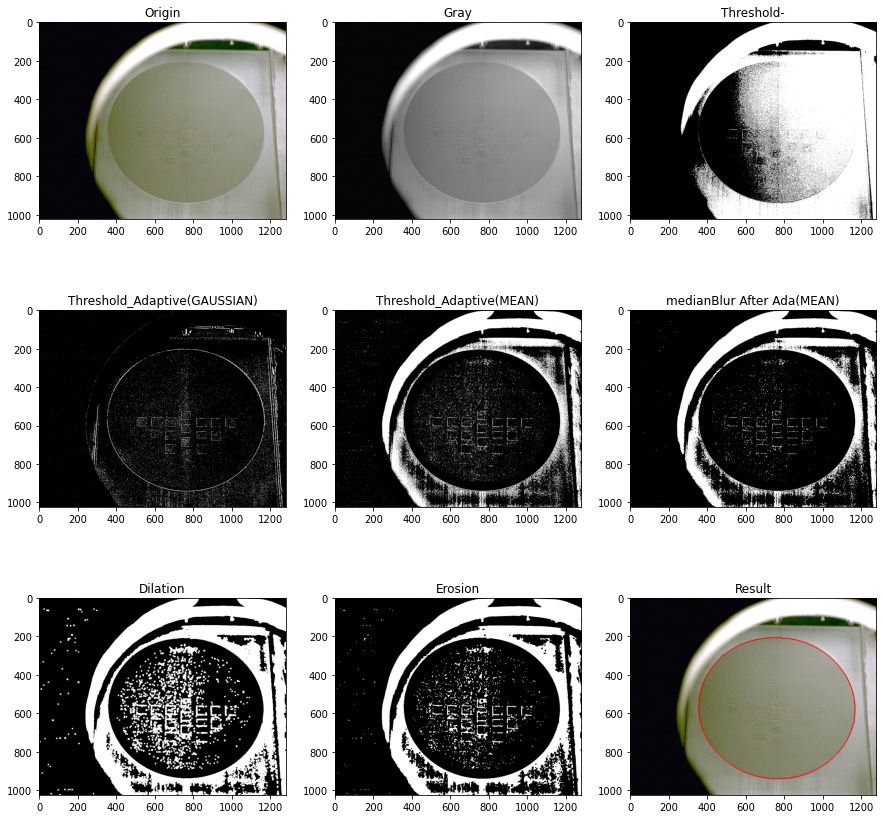

True

In [114]:
img = cv2.imread('input/extra_1.bmp')

# Find the contour of circular workspace in the image.
# -----
# subplots
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axes[0, 0].set_title("Origin")
axes[0, 0].imshow(img_rgb)

# Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
axes[0, 1].set_title("Gray")
axes[0, 1].imshow(gray_rgb)

# Threshold
ret, binary = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[0, 2].set_title("Threshold-")
axes[0, 2].imshow(binary_rgb)

# Threshold_Adaptive(GAUSSIAN)
binary1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -6)
binary1_rgb = cv2.cvtColor(binary1, cv2.COLOR_BGR2RGB)
axes[1, 0].set_title("Threshold_Adaptive(GAUSSIAN)")
axes[1, 0].imshow(binary1_rgb)

# Threshold_Adaptive(MEAN)
binary2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, -6)
binary2_rgb = cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB)
axes[1, 1].set_title("Threshold_Adaptive(MEAN)")
axes[1, 1].imshow(binary2_rgb)

# medianBlur
medianBlur = cv2.medianBlur(binary2, 3)
medianBlur_rgb = cv2.cvtColor(medianBlur, cv2.COLOR_BGR2RGB)
axes[1, 2].set_title('medianBlur After Ada(MEAN)')
axes[1, 2].imshow(medianBlur_rgb)

# Kernel
kernel = np.ones((3, 3), np.uint8)

# Dilate
dilation = cv2.dilate(medianBlur, kernel, iterations = 3)
dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
axes[2, 0].set_title('Dilation')
axes[2, 0].imshow(dilation_rgb)

# Erode
erosion = cv2.erode(dilation, kernel, iterations = 2)
erosion_rgb = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
axes[2, 1].set_title('Erosion')
axes[2, 1].imshow(erosion_rgb)

# Find contour
img_contour = img_rgb.copy()
contours, _ = cv2.findContours(erosion, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 400000 and area < 500000:
        cv2.drawContours(img_contour, cnt, -1, (255, 0, 0), 3)
        
axes[2, 2].set_title("Result")
axes[2, 2].imshow(img_contour)

# subplots show
plt.show()

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', img_contour)

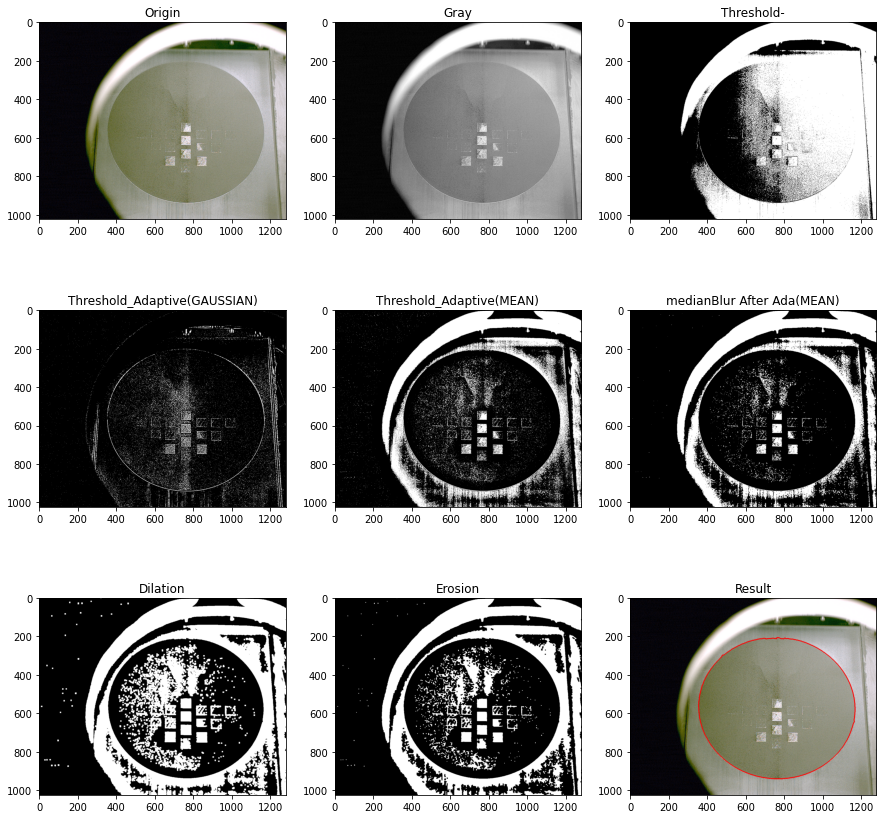

True

In [113]:
img = cv2.imread('input/extra_2.bmp')

# Find the contour of circular workspace in the image.
# -----
# subplots
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axes[0, 0].set_title("Origin")
axes[0, 0].imshow(img_rgb)

# Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
axes[0, 1].set_title("Gray")
axes[0, 1].imshow(gray_rgb)

# Threshold
ret, binary = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[0, 2].set_title("Threshold-")
axes[0, 2].imshow(binary_rgb)

# Threshold_Adaptive(GAUSSIAN)
binary1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -6)
binary1_rgb = cv2.cvtColor(binary1, cv2.COLOR_BGR2RGB)
axes[1, 0].set_title("Threshold_Adaptive(GAUSSIAN)")
axes[1, 0].imshow(binary1_rgb)

# Threshold_Adaptive(MEAN)
binary2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, -6)
binary2_rgb = cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB)
axes[1, 1].set_title("Threshold_Adaptive(MEAN)")
axes[1, 1].imshow(binary2_rgb)

# medianBlur
medianBlur = cv2.medianBlur(binary2, 3)
medianBlur_rgb = cv2.cvtColor(medianBlur, cv2.COLOR_BGR2RGB)
axes[1, 2].set_title('medianBlur After Ada(MEAN)')
axes[1, 2].imshow(medianBlur_rgb)

# Kernel
kernel = np.ones((3, 3), np.uint8)

# Dilate
dilation = cv2.dilate(medianBlur, kernel, iterations = 3)
dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
axes[2, 0].set_title('Dilation')
axes[2, 0].imshow(dilation_rgb)

# Erode
erosion = cv2.erode(dilation, kernel, iterations = 2)
erosion_rgb = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
axes[2, 1].set_title('Erosion')
axes[2, 1].imshow(erosion_rgb)

# Find contour
img_contour = img_rgb.copy()
contours, _ = cv2.findContours(erosion, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 400000 and area < 500000:
        cv2.drawContours(img_contour, cnt, -1, (255, 0, 0), 3)
        
axes[2, 2].set_title("Result")
axes[2, 2].imshow(img_contour)

# subplots show
plt.show()

# save and print result
cv2.imwrite('output/pad_task2_cont.bmp', img_contour)

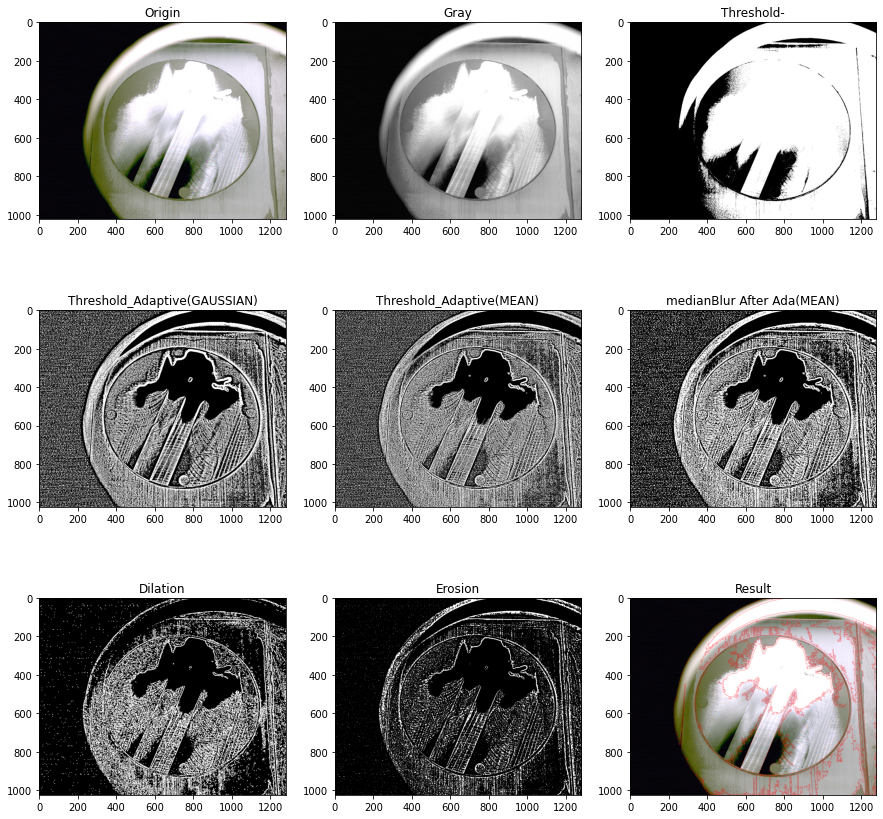

True

In [156]:
img = cv2.imread('input/extra_3.bmp')

# Find the contour of circular workspace in the image.
# -----
# subplots
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axes[0, 0].set_title("Origin")
axes[0, 0].imshow(img_rgb)

# Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
axes[0, 1].set_title("Gray")
axes[0, 1].imshow(gray_rgb)

# Threshold
ret, binary = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
axes[0, 2].set_title("Threshold-")
axes[0, 2].imshow(binary_rgb)

# Threshold_Adaptive(GAUSSIAN)
binary1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, -1)
binary1_rgb = cv2.cvtColor(binary1, cv2.COLOR_BGR2RGB)
axes[1, 0].set_title("Threshold_Adaptive(GAUSSIAN)")
axes[1, 0].imshow(binary1_rgb)

# Threshold_Adaptive(MEAN)
binary2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, -1)
binary2_rgb = cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB)
axes[1, 1].set_title("Threshold_Adaptive(MEAN)")
axes[1, 1].imshow(binary2_rgb)

# medianBlur
medianBlur = cv2.medianBlur(binary2, 3)
medianBlur_rgb = cv2.cvtColor(medianBlur, cv2.COLOR_BGR2RGB)
axes[1, 2].set_title('medianBlur After Ada(MEAN)')
axes[1, 2].imshow(medianBlur_rgb)

# Kernel
kernel = np.ones((3, 3), np.uint8)

# Dilate
dilation = cv2.dilate(erosion, kernel, iterations = 1)
dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
axes[2, 0].set_title('Dilation')
axes[2, 0].imshow(dilation_rgb)

# Erode
erosion = cv2.erode(medianBlur, kernel, iterations = 1)
erosion_rgb = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
axes[2, 1].set_title('Erosion')
axes[2, 1].imshow(erosion_rgb)

# Find contour
img_contour = img_rgb.copy()
contours, _ = cv2.findContours(medianBlur, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 and area < 500000:
        cv2.drawContours(img_contour, cnt, -1, (255, 0, 0), 1)
        
axes[2, 2].set_title("Result")
axes[2, 2].imshow(img_contour)

# subplots show
plt.show()

# save and print result
cv2.imwrite('output/pad_task3_cont.bmp', img_contour)